# Analogias clássicas para helimagnetos (em elaboração)

*Autor: Danilo Lessa Bernardineli ([danlessa@if.usp.br](danlessa@if.usp.br)), NUSP 8944411*

## Disclaimer

Este trabalho ainda está em etapa de elaboração, podem estar faltando seções e não me atentei a seguir uma formatação adequada e coerente por hora

## Introdução

Helimagnetos são magnetos caracterizados por uma magnetização helicoidal a qual pode ser visualizada como sendo ferromagnetos em cada plano sucessivo. (fig. 1)

A origem do ordenamento helimagnética é de uma competição entre interações de troca que dão origem ao ordenamento ferromagnético e antiferromagnético - deste modo, tanto o ferromagnetismo quanto o antiferromagnetismo podem ser enxergados como casos particulares do helimagnetismo mediante o ângulo característico tendendo a zero ou a $\pi$ respectivamente. [1]

Normalmente, os helimagnetos são encontrados em materiais a baixas temperaturas [...] e pressões [...]. (pendente - escrever neste parágrafo rapidamente sobre condições naturais, exemplos reais e eventualmente aplicação) [2]

O tratamento teórico acerca do helimagnetismo conforme ocorre na natureza costuma ser dado a nível de disciplinas de pós-graduação de Física de Estado Sólido e não há análogias clássicas devido a necessidade de modelar as interações de troca entre as moléculas, os quais requerem o arcabouço das hípoteses e ferramentas matemáticas oriundas da Mecânica Quântica e Estatística.

Dado então a dificuldade em modelar o problema conforme sendo fenômeno natural, o intuito deste trabalho é explorativo no sentido de explorar toy-models fundados no eletromagnetismo clássico mas que apresentam a principal característica em comum com os helimagnetos in natura - a magnetização helicoidal.

Será explorado então três toy-models, nos quais cito:

* Cílindro com magnetização helicoidal em torno do eixo de simetria
* Cílindro com magnetização helicoidal em um plano no eixo da simetria
* Cílindro com magnetização cônica e helicoidal em torno do eixo de simetria

Busca-se na exploração destes toy-models a caracterização das correntes ligadas devido a magnetização bem como a visualização destes de um modo intuitivo.

![Ilustração do helimagnetismo](https://img.tfd.com/ggse/88/gsed_0001_0015_0_img3715.png)
**Figura 1** - Ilustração do helimagnetismo, onde $\lambda$ onde é associado ao ângulo característico. 
(fonte: https://encyclopedia2.thefreedictionary.com/Magnetic+Structure)

## Desenvolvimento dos toy-models

### Preliminares, definições e suposições comuns

A estratégia comum no desenvolvimento dos toy-models se trata em pegar discos com espessura desprezível nos cílindros com diferentes alturas em relação a origem e calcular as correntes ligadas devido a magnetização nestes.

As correntes superficiais ligadas nas interfaces entre cada diferencial de disco não será considerado - somente os na superficie lateral do cílindro.

Durante todo o desenvolvimento dos toy-models, será usado o mesmo sistema de coordenadas cilindrícas - o qual está expresso na fig. 2.

Em diversas etapas, é conveniente definir o versor normal na superficie lateral do cilindro como sendo:

$$\hat{n} = \hat{x} \cos{\phi} + \hat{y} \sin{\phi}, \phi \in [0, 2] \pi$$

Adicionalmente, todos os códigos escritos neste trabalho foram executados no Python 3.6.3, utilizando-se das dependências numpy 1.12.1 e matplotlib 2.0.0

![Sistema de coordenadas](http://www.nlreg.com/cylinder.jpg)
**Figura 2** - Sistema de coordenadas usado no desenvolvimento dos toy models. (PROVISÓRIO)

### Cílindro com magnetização helicoidal em torno do eixo de simetria

Como primeiro exemplo, farei um desenvolvimento algébrico das correntes volumétricas e superficiais ligadas de um cílindro magnetizado de tal modo que o vetor magnetização gire em torno do eixo de simetria.

(placeholder para figura ilustrativa do vetor magnetização)

#### Hípoteses e desenvolvimento algébrico

Suponhamos que a magnetização no cilindro esteja orientado para $\hat{x}$ em $z=0$ e que a magnetização irá rotacionar no sentido anti-horário, então a magnetização pode ser escrita como sendo:

$$\vec{M} = M_0 (\hat{x} \cos{\theta} + \hat{y}\sin{\theta})$$

Fazendo-se a suposição de que o ângulo da magnetização para cada diferencial de disco do cilíndro é dependente linearmente da altura no cilíndro:

$$\theta = \frac{2 \pi z}{L}$$

Fazendo a substituição de $\theta$ em $z$ tem-se que:

$$\vec{M} = M_0 (\hat{x} \cos{\frac{2 \pi z}{L}} + \hat{y}\sin{\frac{2 \pi z}{L}})$$

Portanto, utilizando-se das suposições anteriores e das definições para correntes magnéticas ligadas, tem-se que a corrente volumétrica ligada é dada por:

$$\vec{j_b} = \nabla \times \vec{M} = \frac{-2 \pi M_0}{L}(\hat{x}\cos{\frac{2 \pi z}{L}} + \hat{y}\sin{\frac{2 \pi z}{L}})$$

Enquanto que a corrente superficial ligada é dada por:

$$\vec{K_b} = \vec{M} \times \hat{n} = \hat{z} M_0 \sin{(\phi - \frac{2 \pi z}{L})}$$



Utilizando as expressões acima com as suposições de $M_0=1$ e $L=2\pi \leftrightarrow z = \theta$, é possível fazer um código computacional para visualizar um recorte do cilindro, o qual está no bloco abaixo:

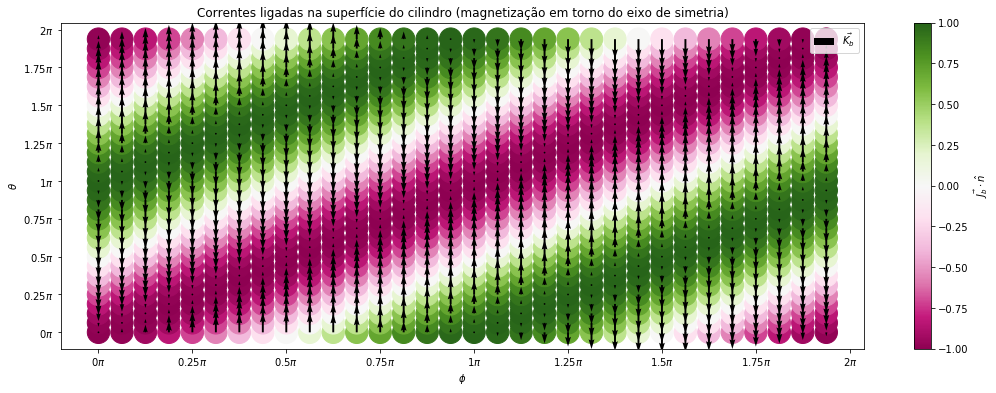

In [16]:
# Dependências 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)

# Criar uma matriz entre 0 e 2pi intervalados em pi/16
(l_min, l_max, d) = (0, 2 * np.pi, np.pi / 16)
Theta, Phi = np.meshgrid(np.arange(l_min, l_max, d), np.arange(l_min, l_max, d))

# Calcular os valores de K_b
U = np.zeros(Theta.shape) # K_b perpendicular ao eixo de simetria
V = np.sin(Phi - Theta) # K_b paralelo ao eixo de simetria

# Calcular os valores de J_b perpendiculares ao eixo de simetria
W = -(np.cos(Theta) * np.cos(Phi) + np.sin(Theta) * np.sin(Phi))

## Fazer os gráficos
plt.title("Correntes ligadas na superfície do cilindro (magnetização em torno do eixo de simetria)")
sc = plt.scatter(Phi, Theta, c=W, s=500, cmap="PiYG")
plt.quiver(Phi, Theta, U, V, label="$\\vec{K_b}$", scale=40)
plt.colorbar(sc, label="$\\vec{J_b} \\cdot \\hat{n}$")
plt.xlabel("$\\phi$")
plt.ylabel("$\\theta$")
xtick_loc = np.linspace(l_min, l_max, 9)
xtick_text = ["$%.3g\\pi$" % (d / np.pi) for d in xtick_loc]
plt.xticks(xtick_loc, xtick_text)
plt.yticks(xtick_loc, xtick_text)
plt.legend()
plt.show()

#### Discussões

Pelo gráfico acima, nota-se que a magnitude das correntes ligadas foram uma padrão helicoidal em torno do cílindro - sendo que a direção das mesmas segue um comportamento de que as correntes superficiais tendem a "escoar" as cargas dos pontos onde a corrente volúmetrica é em direção de sair do cílindro para onde a direção é entrar no cílindro.

### Cílindro com magnetização helicoidal em um plano no eixo da simetria

Um segundo exemplo com comportamento mais complicado se trata de um vetor magnetização que oscile paralelamente ao eixo de simetria de um cílindro, que será o tratado nesta seção.

(placeholder para figura ilustrativa do vetor magnetização)

#### Hípoteses e desenvolvimento algébrico

Inicialmente faz-se as seguintes suposições:

* Na base do cílindro, o vetor magnetização está orientado a $\vec{z}$ e conforme se aumenta a altura do cilindro, o vetor é rotacionado no plano zx.
* o ângulo da magnetização aumenta linearmente com a altura no cilindro

Tendo em vista as suposições iniciais, escreve-se o ângulo da magnetização por cada diferencial de disco do cilindro como:

$$\theta = \frac{2 \pi z}{L}$$

Consequentemente, o vetor magnetização é dado por:

$$\vec{M} = M_0 (\hat{x} \sin{\theta} + \hat{z}\cos{\theta})$$


Substituindo $\theta$ por $z$, tem-se que:

$$\vec{M} = M_0 (\hat{x} \sin{(\frac{2 \pi z}{L})} + \hat{z}\cos{(\frac{2 \pi z}{L})})$$

Portanto, utilizando-se das suposições anteriores e das definições para correntes magnéticas ligadas, tem-se que a corrente volumétrica ligada é dada por:

$$\vec{j_b} = \nabla \times \vec{M} = -\hat{y} \frac{2 \pi M_0}{L}  \sin{(\frac{2 \pi z}{L})}$$

Enquanto que a corrente superficial ligada é dada por:

$$\vec{K_b} = \vec{M} \times \hat{n} = M_0(-\hat{x} \cos{(\frac{2 \pi z}{L})}\sin{\phi} +\hat{y}\cos{(\frac{2 \pi z}{L}})\cos{\phi} + \hat{z} \sin{(\frac{2 \pi z}{L})} \sin{\phi} )$$

Uma forma de melhor visualizar a expressão da corrente superficial é separá-la em componentes perpendiculares e paralelos a $\hat{z}$.

Para a componente perpendicular

$$\hat{z} \times \hat{n} = -\hat{x} sin{\phi} + \hat{y} \cos{\phi}$$

Portanto, tem-se que

$$\vec{K_b} = M_0 (\hat{z} \times \hat{n} \cos{\theta} + \hat{z} \sin{\theta} \sin{\phi})$$

Logo:

$$K_{b \bot z} = M_0 \cos{\theta} $$
$$K_{b \parallel z} = M_0 \sin{\theta} \sin{\phi} $$

Adicionalmente

$$\vec{j_b} \cdot \hat{n} = -\hat{y}\frac{2 \pi M_0}{L} \sin{\phi} \sin{(\frac{2 \pi z}{L})} $$

Utilizando as expressões acima com as suposições de $M_0=1$ e $L=2\pi \leftrightarrow z = \theta$, é possível fazer um código computacional para visualizar um recorte do cilindro, o qual está no bloco abaixo:

In [15]:
# Dependências 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)

# Criar uma matriz entre 0 e 2pi intervalados em pi/16
(l_min, l_max, d) = (0, 2 * np.pi, np.pi / 16)
Theta, Phi = np.meshgrid(np.arange(l_min, l_max, d), np.arange(l_min, l_max, d))

# Calcular os valores de K_b
U = np.cos(Theta) # K_b perpendicular ao eixo de simetria
V = np.sin(Theta) * np.sin(Phi) # K_b paralelo ao eixo de simetria

W = -np.sin(Phi) * np.sin(Theta)

## Fazer os gráficos
plt.title("Correntes ligadas na superfície lateral do cilindro (magnetização em paralelo ao plano do eixo de simetria)")
sc = plt.scatter(Phi, Theta, c=W, s=500, cmap="PiYG")
plt.quiver(Phi, Theta, U, V, label="$\\vec{K_b}$", scale=40)
#CS = plt.contour(Phi, Theta, np.sqrt(U ** 2 + V ** 2))
#plt.clabel(CS, inline=1, fontsize=10)
plt.colorbar(sc, label="$\\vec{J_b} \\cdot \\hat{n}$")
#plt.colorbar(CS, label="$||\\vec{K_b}||$")
plt.xlabel("$\\phi$")
plt.ylabel("$\\theta$")
xtick_loc = np.linspace(l_min, l_max, 9)
xtick_text = ["$%.3g\\pi$" % (d / np.pi) for d in xtick_loc]
plt.xticks(xtick_loc, xtick_text)
plt.yticks(xtick_loc, xtick_text)
plt.legend()
plt.show()

#### Discussões

$$\Pela visualização recorte do cilindro é possível notar algumas características:

* Há o surgimento de dois pares de vórtices e anti-vórtices, sendo que os vórtices estão localizados no mesmo ângulo $\phi$ do cilindro enquanto que os anti-vórtices estão do lado oposto do cilindro em relação aos vórtices

* Os vórtices e anti-vórtices estão localizados no mesmo ponto onde o vetor magnetização se torna perpendicular a superfície do cilindro durante sua rotação

* O lado do cilindro onde estão os vórtices é relacionado com a rotação da magnetização ao longo do cilindro, isto é, não há uma simetria de inversão

### Cílindro com magnetização cônica e helicoidal em torno do eixo de simetria

(Pendente)

(placeholder para figura ilustrativa do vetor magnetização)

### Hípoteses e desenvolvimento algébrico

(Pendente)

(placeholder para figura ilustrativa do vetor magnetização)

### Discussões

(Pendente)

## Conclusões

## Referências

[1] - E. Rastelli, L. Reatto, A. Tassi; Helimagnetism in the Heisenberg Model: New Features and Old Mechanisms - 1984. doi:https://doi.org/10.1007/978-3-642-82369-5_35

[2] -

[3] -